In [795]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [796]:
df = pd.read_csv("Z:\Learning and Development\Data Science\Applied Data Science with Python\Applied Chartin and Plotting\phe_cases_london_england.csv")

In [797]:
df = df[['Date', 'HomeTeam', 'AwayTeam','FTR']]

In [798]:
df_london = df[(df["HomeTeam"]=="Chelsea") | (df["HomeTeam"]=="Arsenal") | (df["HomeTeam"]=="Tottenham") | (df["HomeTeam"]=="Crystal Palace") | (df["HomeTeam"]=="West Ham") | (df["AwayTeam"]=="Chelsea") | (df["AwayTeam"]=="Arsenal") | (df["AwayTeam"]=="Tottenham") | (df["AwayTeam"]=="Crystal Palace") | (df["AwayTeam"]=="West Ham")]
df_london.columns = ["Date", "HomeTeam", "AwayTeam", "Wins"]

In [799]:
df_london["Wins"] = df_london["Wins"].apply(lambda x: 1 if x=="H" else 0)

<ipython-input-799-bd64e3444f2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london["Wins"] = df_london["Wins"].apply(lambda x: 1 if x=="H" else 0)


In [800]:
from datetime import datetime

df_london["Date"] = df_london["Date"].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

<ipython-input-800-5e89ffab08fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_london["Date"] = df_london["Date"].apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))


In [801]:
def london_team(x):
    teams = ["Chelsea", "Arsenal", "Tottenham", "West Ham"]
    
    if any([x["HomeTeam"] for i in teams if x["HomeTeam"] in teams]):
        x['Team'] = x["HomeTeam"]
    elif any([x["AwayTeam"] for i in teams if x["AwayTeam"] in teams]):
        x['Team'] = x["AwayTeam"]
        if x["Wins"] == 1:
            x["Wins"] = 0
            
    if x["Wins"] == 0:
        x["Losses"] = 1
    else:
        x["Losses"] = 0
            
    return x
            
df_london = df_london.apply(london_team, axis=1)

In [802]:
df_london.drop(labels=["HomeTeam","AwayTeam"], axis=1, inplace=True)

In [803]:
df_london = df_london[["Date", "Team", "Wins", "Losses"]]

In [804]:
df_london["Date"] = df_london["Date"].apply(lambda x: x.year)

In [805]:
df_london_wins = df_london.groupby(["Date", "Team"]).agg({"Wins": np.sum})

In [806]:
df_london_losses = df_london.groupby(["Date", "Team"]).agg({"Losses": np.sum})

In [807]:
df = pd.concat([df_london_losses,df_london_wins], axis=1)

In [808]:
df["Win/Loss"] = df["Wins"]/(df["Wins"] + df["Losses"])

In [809]:
df = df.unstack()

In [810]:
df = df["Win/Loss"]

In [811]:
df = df.rolling(2, min_periods=1).sum()

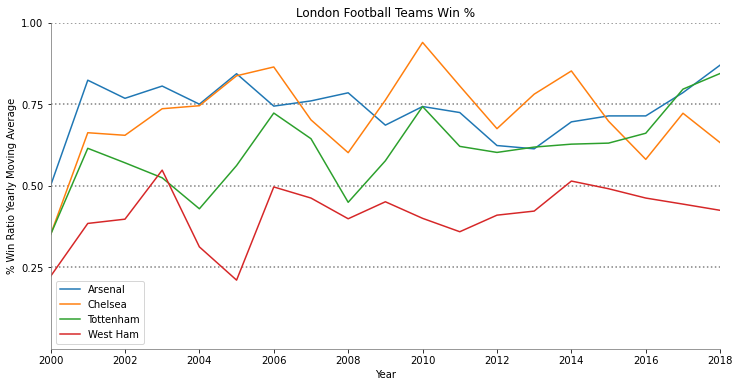

In [812]:
df.plot(figsize=(12,6))
ax = plt.gca()
ax.axis([2000,2018,0,1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("grey")
ax.spines["left"].set_color("grey")
plt.yticks([0.25,0.5,0.75,1])
plt.hlines([0.25,0.5,0.75,1], xmin=2000, xmax=2018, colors='k', linestyles='dotted', label='',data=None, alpha=0.5)
plt.xlabel("Year")
plt.ylabel("% Win Ratio Yearly Moving Average")
plt.title("London Football Teams Win %")
plt.legend()